<a href="https://colab.research.google.com/github/BelemoualemChaimae/Face_recognition_using_face_recognition_library/blob/main/face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install cmake dlib face_recognition numpy opencv-python 

     |████████████████████████████████| 100.2MB 42kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=4cf9e6fe2a263159dd442688524f4e7dfa591e98562de9fca488a14b756fdca2
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
from google.colab import drive 
drive.mount('/gdrive/')

Mounted at /gdrive/


In [ ]:
%cd /gdrive/My Drive/

/gdrive/My Drive


In [ ]:
ls

 8086.pdf
 analyse_num_SMI.pdf
 arabic_tweet_sentiment_analysis.rar
'arbre1 la structure.pdf'
'arbre 2 Algorithmes sur les arbres (1).pdf'
'arbre 2 Algorithmes sur les arbres.pdf'
 Arbre_de_desicion_cours_boumhidi.mp4
 ay4.jpg
'Base de donnée Recorded by Chama'/
 Belemoualem_Chaimae_mini_project.mp4
 binomes.gsheet
 blooodDonation/
 c3strucdyn.pdf
'c4Listes chaînées inser.pdf'
"ch2_Execution d'instruction"
'chaimaebelemoualem (1).gdoc'
'chaimaebelemoualem (2).gdoc'
 chaimaebelemoualem.gdoc
'Chaimae_belemoualem Rézo Exercice.rar'
'chama&oussama.jpg'
 chp_2_SMI.pdf
 co.jpg
'Colab Notebooks'/
'Copie de Exp2_partie_2.m4a'
 Correction_Examen_2017_Prog_C.pdf
 Course_Downloadable2.zip
 Cours-ref.rar
 CV_DIB_Mohamed_DUT.docx
 data/
 DATABASE/
 DerniéreSéanceTaln.autosave.mp4
'Emailing Echange_de_donnees_Serie1.pdf'
'Emailing Listes chaînées-1_52.pdf'
'English_for_computer_users_3 (1).pdf'
 English_for_computer_users_3.pdf
'examens (1).pdf'
'Examens 2015.pdf'
 examens.pdf
 Exercices_Cha

enter the name of the image file: Team.PNG


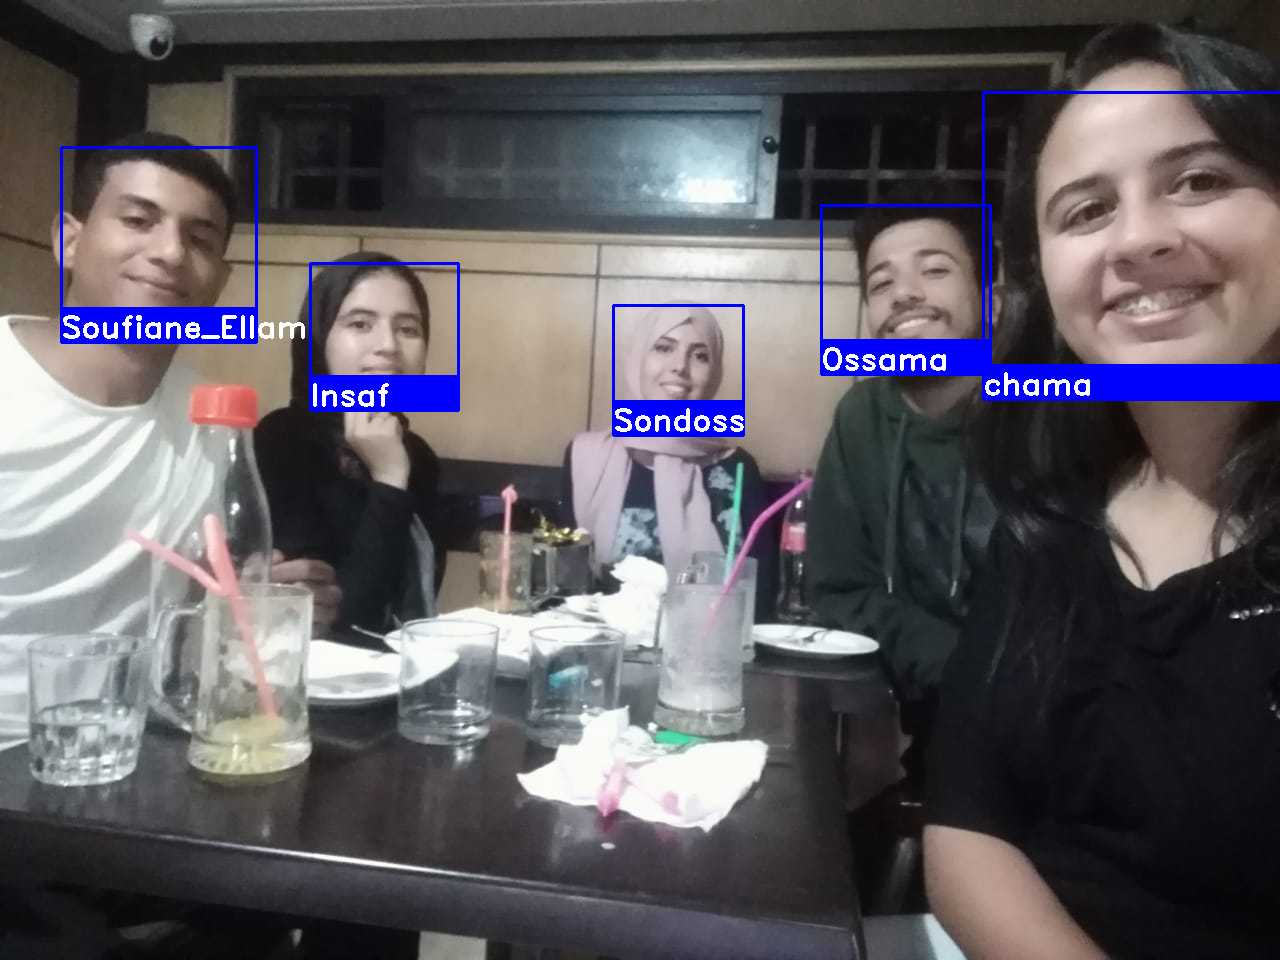

['Insaf', 'Soufiane_Ellam', 'Ossama', 'Sondoss', 'chama']


In [ ]:
import face_recognition as fr
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


def get_encoded_faces():
    
    encoded = {}

    for dirpath, dnames, fnames in os.walk("./faces"):
        for f in fnames:
            if f.endswith(".jpg") or f.endswith(".PNG"):
                face = fr.load_image_file("./faces/" + f)
                encoding = fr.face_encodings(face)[0]
                encoded[f.split(".")[0]] = encoding

    return encoded



def classify_face(im):
    
    faces = get_encoded_faces()
    faces_encoded = list(faces.values())
    known_face_names = list(faces.keys())

    img = cv2.imread(im, 1)
    #img = cv2.resize(img, (0, 0), fx=0.5, fy=0.5)
    #img = img[:,:,::-1]
 
    face_locations = fr.face_locations(img)
    unknown_face_encodings = fr.face_encodings(img, face_locations)

    face_names = []
    for face_encoding in unknown_face_encodings:
        # See if the face is a match for the known face(s)
        matches = fr.compare_faces(faces_encoded, face_encoding, tolerance=0.6)
        name = "Unknown"

        # use the known face with the smallest distance to the new face
        face_distances = fr.face_distance(faces_encoded, face_encoding)
        best_match_index = np.argmin(face_distances)
        if matches[best_match_index]:
            name = known_face_names[best_match_index]

        face_names.append(name)

        for (top, right, bottom, left), name in zip(face_locations, face_names):
            # Draw a box around the face
            cv2.rectangle(img, (left-20, top-20), (right+20, bottom+20), (255, 0, 0), 2)

            # Draw a label with a name below the face
            cv2.rectangle(img, (left-20, bottom -15), (right+20, bottom+20), (255, 0, 0), cv2.FILLED)
            font = cv2.FONT_HERSHEY_DUPLEX
            cv2.putText(img, name, (left -20, bottom + 15), font, 1.0, (255, 255, 255), 2)


    # Display the resulting image
    while True:

        cv2_imshow(img)
        return face_names 

def learning(image):
    c_face =classify_face(image)
    if 'Unknown' in c_face:
      que = input("There is an Unknown Face Would You like Add it to system ")
      if que == 'yes' or que == "Yes":
          imageFileName = input("enter the name of the image file: ")
          shutil.move(imageFileName, './faces')
          print(learning(image))
    else:
      print(c_face)
    
    
image = input("enter the name of the image file: ")    

learning(image)


# New Section

# New Section

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
cap = cv2.VideoCapture(0) 
while(cap.isOpened()):
  ret, frame = cap.read()
  cv2_imshow(frame)
cap.release()

cv2.destroyAllWindows()




In [ ]:
face=fr.load_image_file("faces/" + f)

a1.png  a2.png  a3.jpg  a4.jpg  a5.jpg  a6.jpg


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
image=cv2.imread("friends.jpg")


In [ ]:

from google.colab.patches import cv2_imshow

In [ ]:

cv2_imshow(image)

In [ ]:
cv2.imwrite("test.png",image)

True